# **QA**

In [127]:
# import libraries
import uproot
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.stats import norm

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## **I. Initial Checks**

### **1. Injected Anti-Sexaquarks**

In [ ]:
# plot pt, phi and rapidity of the injected anti-sexaquarks
file = uproot.open("../macros/test/InjectedResults.root")
tree = file["IC"]

# convert branch "SM" into a numpy array
SM = tree["SM"].array() # mass
SPx = tree["SPx"].array() # momentum
SPy = tree["SPy"].array()
SPz = tree["SPz"].array()

SPt = np.sqrt(SPx**2 + SPy**2)
SPhi = np.arctan2(SPy, SPx)
SPhi = np.where(SPhi < 0, SPhi + 2 * np.pi, SPhi)
SMt = np.sqrt(SM**2 + SPt**2)
SRapidity = np.arcsinh(SPz / SMt)

variables = [SPt, SPhi, SRapidity]
variable_names = [r"$p_T$ (GeV/c)", r"$\phi$ (rad)", "Rapidity"]

plt.figure(figsize=(6 * len(variables), 6))

for i in range(len(variables)):

    ax = plt.subplot(1, len(variables), i + 1)

    n, bins, patches = ax.hist(variables[i], bins=100, color=colors[i], histtype="step", label=r"MC Gen. Injected $\bar{S}$", linewidth=2)

    n_entries = len(variables[i])
    stats = f"Entries: {n_entries:.0f}"
    ax.hist(variables[i], bins=100, alpha=0., label=stats) # invisible histogram to show stats on the legend

    ax.set_ylim(top=1.2*np.max(n))
    ax.set_ylabel("Counts", loc='top', fontsize=12, fontweight='bold')
    ax.set_xlabel(variable_names[i], loc='right', fontsize=12)
    ax.tick_params(direction='in', top=True, right=True)
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig("QA_InjectedSexaquarks.svg")
plt.show()

### **2. Struck Nucleon**

In [ ]:
# plot p, phi, theta, px, py, pz of struck nucleons
def gaussian(x, a, mu, sigma):
    return a * np.exp(-0.5 * ((x - mu) / sigma)**2)

file = uproot.open("../macros/test/InjectedResults.root")
# file = uproot.open("../macros/SimpleGen_FermiMotion.root")
tree = file["IC"]

# convert branch "SM" into a numpy array
NPx = tree["NPx"].array() # momentum
NPy = tree["NPy"].array()
NPz = tree["NPz"].array()

NP = np.sqrt(NPx**2 + NPy**2 + NPz**2)
NPt = np.sqrt(NPx**2 + NPy**2)
NPhi = np.arctan2(NPy, NPx)
NPhi = np.where(NPhi < 0, NPhi + 2 * np.pi, NPhi)
NTheta = np.arccos(NPz / NP)

variables = [NP, NPhi, NTheta, NPx, NPy, NPz]
variable_names = [r"$p$ (GeV/c)", r"$\phi$ (rad)", r"$\theta$ (rad)", r"$p_x$ (GeV/c)", r"$p_y$ (GeV/c)", r"$p_z$ (GeV/c)"]

n = len(variables)
rows = n // 3 + (n % 3 > 0)  # Calculate the number of rows needed
cols = 3  # Set the number of columns

plt.figure(figsize=(6 * cols, 6 * rows))

for i in range(n):

    row = i // cols
    col = i % cols
    ax = plt.subplot(rows, cols, row * cols + col + 1)

    bin_content, bins, patches = ax.hist(variables[i], bins=100, color=colors[i], histtype="step", label=r"MC Gen. Struck Nucleon", linewidth=2)

    n_entries = len(variables[i])
    stats = f"Entries: {n_entries:.0f}"
    ax.hist(variables[i], bins=100, alpha=0., label=stats) # invisible histogram to show stats on the legend

    # if the var is momentum, fit a gaussian to it
    if variable_names[i] == r"$p$ (GeV/c)":
        avg = np.mean(variables[i])
        std = np.std(variables[i])
        popt, _ = curve_fit(gaussian, bins[:-1], bin_content, p0=[1, avg, std])
        x = np.linspace(np.min(variables[i]), np.max(variables[i]), 1000)
        ax.plot(x, gaussian(x, *popt), color=colors[3], linestyle="-", label=r"Gaussian: $\mu$ = %.3f, $\sigma$ = %.3f" % (popt[1], popt[2]), linewidth=2)

    ax.set_ylim(top=1.3 * np.max(bin_content))
    ax.set_ylabel("Counts", loc='top', fontsize=12, fontweight='bold')
    ax.set_xlabel(variable_names[i], loc='right', fontsize=12)
    ax.tick_params(direction='in', top=True, right=True)
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig("QA_StruckNucleons_A.svg")
# plt.savefig("QA_StruckNucleons_B.svg")
plt.show()

### **3. Anti-Sexaquark—Nucleon Interaction**

In [ ]:
# plot radius of signal interactions
file = uproot.open("../sexaquark/test_sig/AnalysisResults_A1.8_kalmanV0s.root")

histograms = file["Hists/"]
hist_dict = {hist.name: hist for hist in histograms}

plt.figure(figsize=(6, 6))

hist_name = "MCGen_All_AntiSexaquark_Radius"
values, edges = hist_dict[hist_name].to_numpy()

plot_name = "MC Gen. Signal Interaction"
plt.hist(edges[:-1], edges, weights=values, label=plot_name, histtype='step', color=colors[7], linewidth=2)

n_entries = np.sum(values)
stats = f"Entries: {n_entries:.0f}"
plt.hist(edges[:-1], edges, alpha=0., label=stats) # invisible histogram to show stats on the legend

plt.ylabel('Counts', loc='top', fontsize=12, fontweight='bold')
plt.xlabel('Radius (cm)', loc='right', fontsize=12)
plt.ylim(top=1.3 * np.max(values))
plt.tick_params(direction='in', top=True, right=True)
plt.grid(True, linestyle='--', alpha=0.5)

# add vertical lines on 5 and 180
plt.axvline(x=5, color=colors[3], alpha=0.8, linestyle="--", linewidth=2)
plt.axvline(x=180, color=colors[3], alpha=0.8, linestyle="--", linewidth=2)

plt.legend(loc="upper center", fontsize=12)

plt.tight_layout()
plt.savefig("QA_SignalInteraction_Radius.svg")
plt.show()

In [ ]:
# plot pt, phi and rapidity of the injected anti-sexaquarks (after interaction)

variables = ["Mass", "Pt", "Pz", "Rapidity"] # TEMPORARY: change Pz by Phi!
variable_names = [r"Mass (GeV/$c^2$)", r"$p_T$ (GeV/c)", r"$\phi$ (rad)", "Rapidity"]

n = len(variables)
cols = 2
rows = 2
plt.figure(figsize=(6 * cols, 6 * rows))

for i in range(len(variables)):

    row = i // cols
    col = i % cols
    plt.subplot(rows, cols, row * cols + col + 1)

    hist_name = f"MCGen_All_AntiSexaquark_{variables[i]}"
    values, edges = hist_dict[hist_name].to_numpy()

    plot_name = r"MC Gen. $\bar{S}$ (after interaction)"
    plt.hist(edges[:-1], edges, weights=values, label=plot_name, histtype='step', color=colors[i], linewidth=2)

    n_entries = np.sum(values)
    stats = f"Entries: {n_entries:.0f}"
    plt.hist(edges[:-1], edges, weights=values, alpha=0., label=stats) # invisible histogram to show stats on the legend

    plt.ylim(top=1.2*np.max(values))
    plt.ylabel("Counts", loc='top', fontsize=12, fontweight='bold')
    plt.xlabel(variable_names[i], loc='right', fontsize=12)
    plt.tick_params(direction='in', top=True, right=True)
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.legend(loc="upper left", fontsize=12)

plt.tight_layout()
plt.savefig("QA_SexaquarksAfterInteraction.svg")
plt.show()

## **II. MC Generated**

## **III. MC Reconstructed**

In [4]:
# load files
file_bkg = uproot.open("../qa/test_bkg/AnalysisResults_LHC20e3a.root")
histograms_bkg = file_bkg["Hists/"]
hist_dict_bkg = {hist.name: hist for hist in histograms_bkg}

file_sig = uproot.open("../qa/test_sig/AnalysisResults_LHC23l1a2.root")
histograms_sig = file_sig["Hists/"]
hist_dict_sig = {hist.name: hist for hist in histograms_sig}

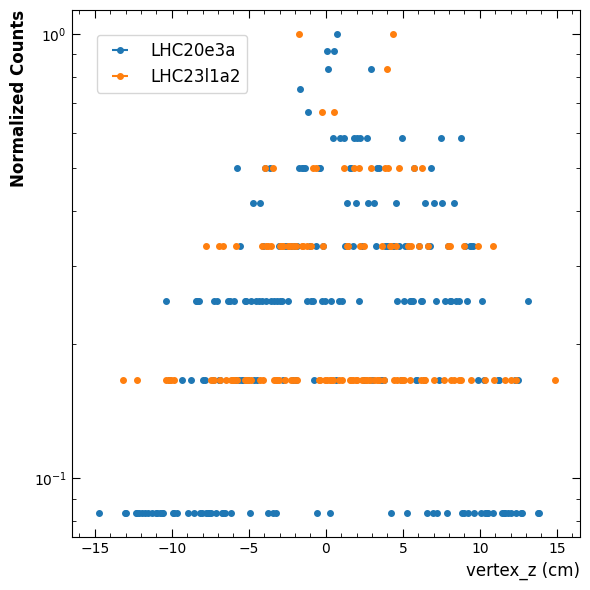

In [5]:
# plot z vertex of the collisions
plt.figure(figsize=(6, 6))

hist_name = "hVertexZ"

values_bkg, edges_bkg = hist_dict_bkg[hist_name].to_numpy()
centers_bkg = (edges_bkg[:-1] + edges_bkg[1:]) / 2
weights_bkg = values_bkg / np.max(values_bkg)
bin_width_bkg = edges_bkg[1] - edges_bkg[0]
plt.errorbar(centers_bkg, weights_bkg, xerr=bin_width_bkg/2, fmt='o', label="LHC20e3a", color=colors[0], markersize=4)

values_sig, edges_sig = hist_dict_sig[hist_name].to_numpy()
centers_sig = (edges_sig[:-1] + edges_sig[1:]) / 2
weights_sig = values_sig / np.max(values_sig)
bin_width_sig = edges_sig[1] - edges_sig[0]
plt.errorbar(centers_sig, weights_sig, xerr=bin_width_sig/2, fmt='o', label="LHC23l1a2", color=colors[1], markersize=4)

plt.yscale('log')
plt.ylabel('Normalized Counts', loc='top', fontsize=12, fontweight='bold')

plt.xlabel('vertex_z (cm)', loc='right', fontsize=12)

plt.minorticks_on()
plt.tick_params(direction='in', axis='both', which='both', top=True, right=True)
plt.tick_params(which='minor', length=3)
plt.tick_params(which='major', length=6)

plt.legend(loc="upper left", fontsize=12, borderaxespad=1.5)

plt.tight_layout()
# plt.savefig("QA_SignalInteraction_Radius.svg")
plt.show()

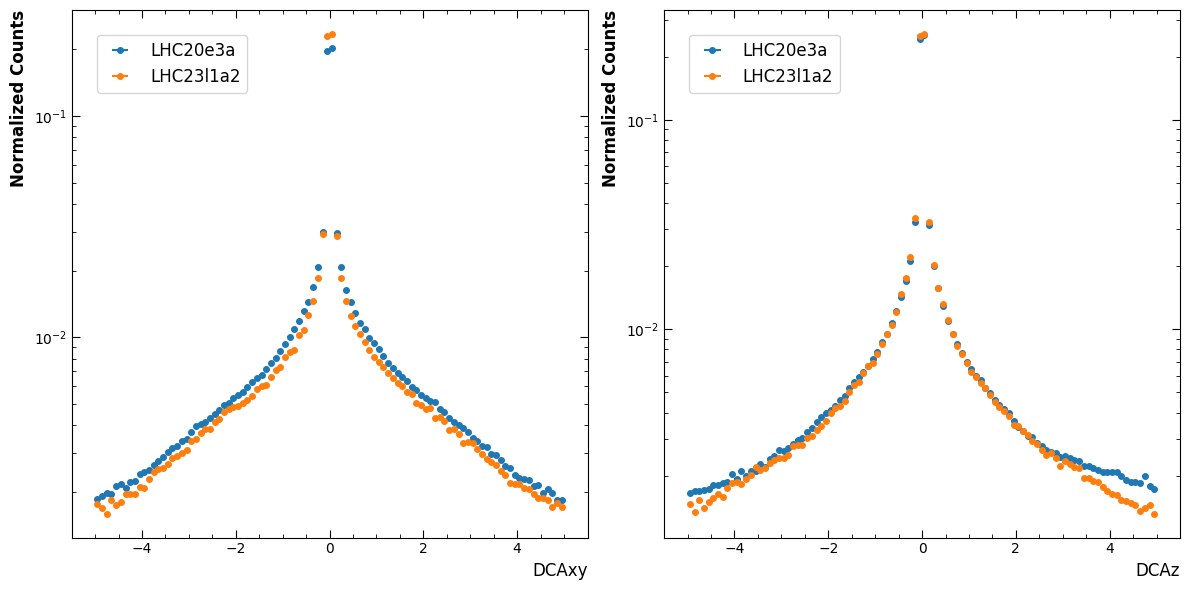

In [9]:
# plot DCAxy and DCAz of all tracks
hist_names = ["DCAxy", "DCAz"]

plt.figure(figsize=(2 * 6, 6))

for i in range(len(hist_names)):

    plt.subplot(1, 2, i + 1)

    hist_name = hist_names[i]

    values_bkg, edges_bkg = hist_dict_bkg[hist_name].to_numpy()
    centers_bkg = (edges_bkg[:-1] + edges_bkg[1:]) / 2
    weights_bkg = values_bkg / sum(values_bkg) # np.max(values_bkg)
    bin_width_bkg = edges_bkg[1] - edges_bkg[0]
    plt.errorbar(centers_bkg, weights_bkg, xerr=bin_width_bkg/2, fmt='o', label="LHC20e3a", color=colors[0], markersize=4)

    values_sig, edges_sig = hist_dict_sig[hist_name].to_numpy()
    centers_sig = (edges_sig[:-1] + edges_sig[1:]) / 2
    weights_sig = values_sig / sum(values_sig) # np.max(values_sig)
    bin_width_sig = edges_sig[1] - edges_sig[0]
    plt.errorbar(centers_sig, weights_sig, xerr=bin_width_sig/2, fmt='o', label="LHC23l1a2", color=colors[1], markersize=4)

    plt.yscale('log')
    plt.ylabel('Normalized Counts', loc='top', fontsize=12, fontweight='bold')

    plt.xlabel(hist_name, loc='right', fontsize=12)

    plt.minorticks_on()
    plt.tick_params(direction='in', axis='both', which='both', top=True, right=True)
    plt.tick_params(which='minor', length=3)
    plt.tick_params(which='major', length=6)

    plt.legend(loc="upper left", fontsize=12, borderaxespad=1.5)

plt.tight_layout()
# plt.savefig("QA_SignalInteraction_Radius.svg")
plt.show()

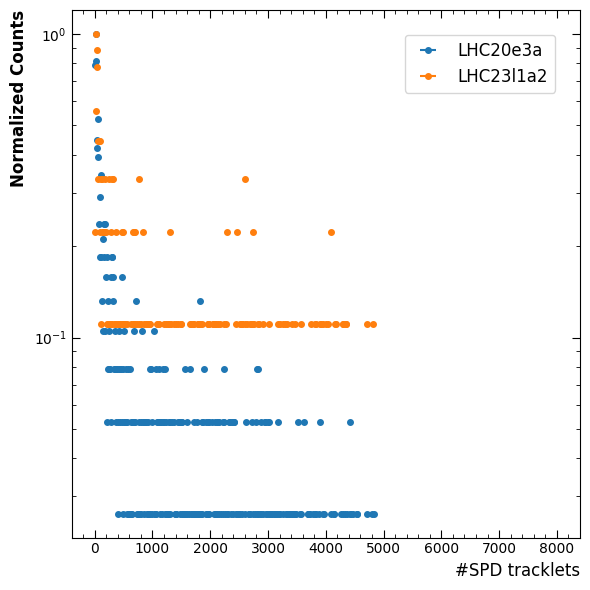

In [12]:
# plot number of SPD tracklets
plt.figure(figsize=(6, 6))

hist_name = "hNtracklets"

values_bkg, edges_bkg = hist_dict_bkg[hist_name].to_numpy()
centers_bkg = (edges_bkg[:-1] + edges_bkg[1:]) / 2
weights_bkg = values_bkg / np.max(values_bkg)
bin_width_bkg = edges_bkg[1] - edges_bkg[0]
plt.errorbar(centers_bkg, weights_bkg, xerr=bin_width_bkg/2, fmt='o', label="LHC20e3a", color=colors[0], markersize=4)

values_sig, edges_sig = hist_dict_sig[hist_name].to_numpy()
centers_sig = (edges_sig[:-1] + edges_sig[1:]) / 2
weights_sig = values_sig / np.max(values_sig)
bin_width_sig = edges_sig[1] - edges_sig[0]
plt.errorbar(centers_sig, weights_sig, xerr=bin_width_sig/2, fmt='o', label="LHC23l1a2", color=colors[1], markersize=4)

plt.yscale('log')
plt.ylabel('Normalized Counts', loc='top', fontsize=12, fontweight='bold')

plt.xlabel('#SPD tracklets', loc='right', fontsize=12)

plt.minorticks_on()
plt.tick_params(direction='in', axis='both', which='both', top=True, right=True)
plt.tick_params(which='minor', length=3)
plt.tick_params(which='major', length=6)

plt.legend(loc="upper right", fontsize=12, borderaxespad=1.5)

plt.tight_layout()
# plt.savefig("QA_SignalInteraction_Radius.svg")
plt.show()

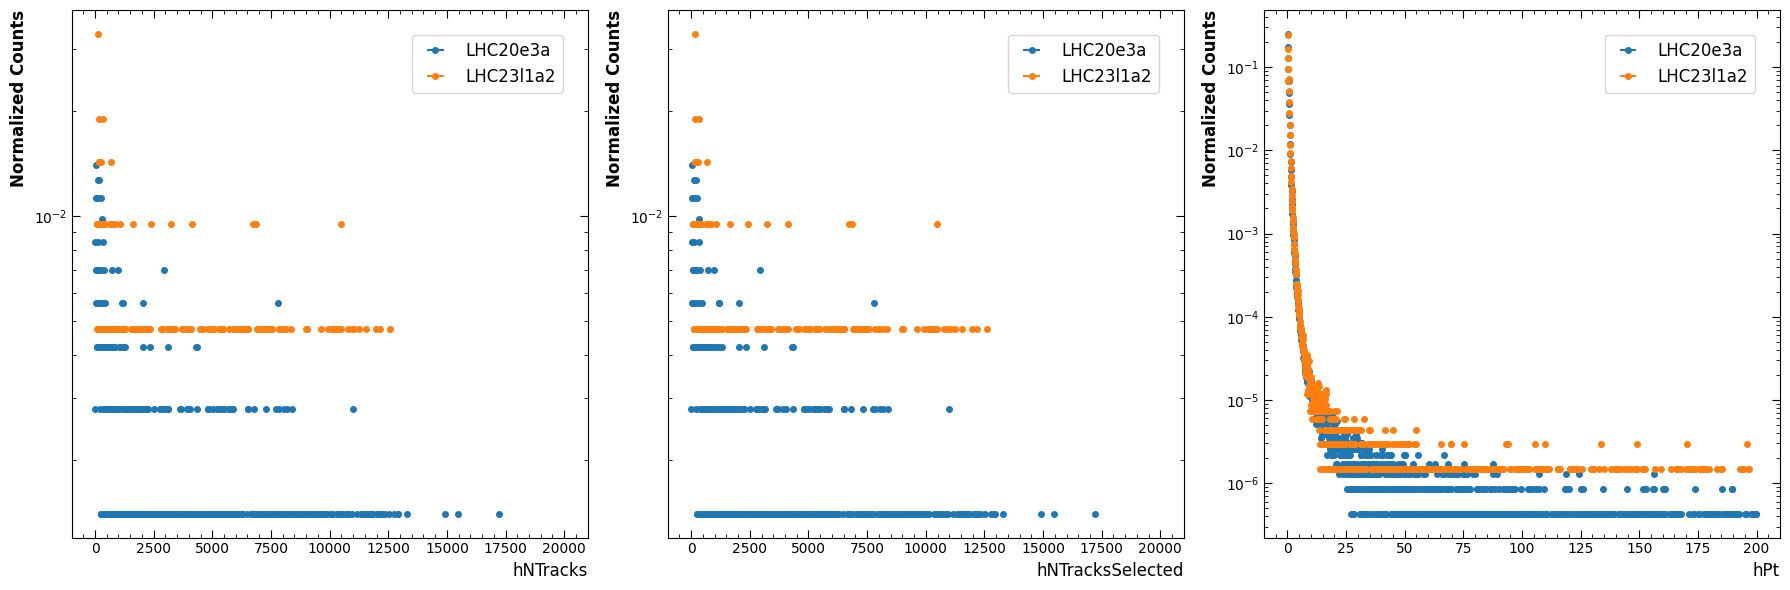

In [14]:
# plot n tracks, n selected tracks, pt
hist_names = ["hNTracks", "hNTracksSelected", "hPt"]

plt.figure(figsize=(len(hist_names) * 6, 6))

for i in range(len(hist_names)):

    plt.subplot(1, len(hist_names), i + 1)

    hist_name = hist_names[i]

    values_bkg, edges_bkg = hist_dict_bkg[hist_name].to_numpy()
    centers_bkg = (edges_bkg[:-1] + edges_bkg[1:]) / 2
    weights_bkg = values_bkg / sum(values_bkg) # np.max(values_bkg)
    bin_width_bkg = edges_bkg[1] - edges_bkg[0]
    plt.errorbar(centers_bkg, weights_bkg, xerr=bin_width_bkg/2, fmt='o', label="LHC20e3a", color=colors[0], markersize=4)

    values_sig, edges_sig = hist_dict_sig[hist_name].to_numpy()
    centers_sig = (edges_sig[:-1] + edges_sig[1:]) / 2
    weights_sig = values_sig / sum(values_sig) # np.max(values_sig)
    bin_width_sig = edges_sig[1] - edges_sig[0]
    plt.errorbar(centers_sig, weights_sig, xerr=bin_width_sig/2, fmt='o', label="LHC23l1a2", color=colors[1], markersize=4)

    plt.yscale('log')
    plt.ylabel('Normalized Counts', loc='top', fontsize=12, fontweight='bold')

    plt.xlabel(hist_name, loc='right', fontsize=12)

    plt.minorticks_on()
    plt.tick_params(direction='in', axis='both', which='both', top=True, right=True)
    plt.tick_params(which='minor', length=3)
    plt.tick_params(which='major', length=6)

    plt.legend(loc="upper right", fontsize=12, borderaxespad=1.5)

plt.tight_layout()
# plt.savefig("QA_SignalInteraction_Radius.svg")
plt.show()

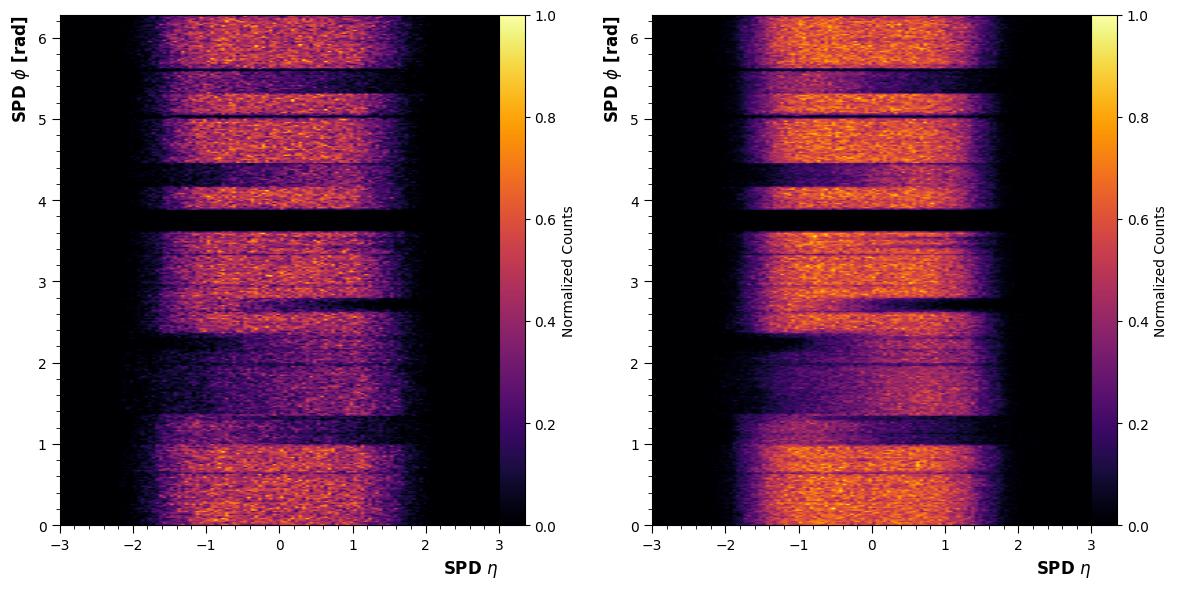

In [137]:
# plot SPD phi vs SPD eta
hist_name = "hSPDphivsSPDeta"

hist_dicts = [hist_dict_sig, hist_dict_bkg]

plt.figure(figsize=(len(hist_dicts) * 6, 6))

for i in range(len(hist_dicts)):

    plt.subplot(1, len(hist_dicts), i + 1)

    hist_dict = hist_dicts[i]

    values, xedges, yedges = hist_dict[hist_name].to_numpy()
    xcenters = (xedges[:-1] + xedges[1:]) / 2
    ycenters = (yedges[:-1] + yedges[1:]) / 2
    weights = values / np.max(values)
    plt.imshow(weights.T, origin='lower', extent=(xedges[0], xedges[-1], yedges[0], yedges[-1]), aspect='auto', cmap='inferno')

    plt.ylabel(r'SPD $\phi$ [rad]', loc='top', fontsize=12, fontweight='bold')
    plt.xlabel(r'SPD $\eta$', loc='right', fontsize=12, fontweight='bold')

    plt.minorticks_on()
    plt.tick_params(direction='out', axis='both', which='both')
    plt.tick_params(which='minor', length=3)
    plt.tick_params(which='major', length=6)
    # plt.tick_params(axis='y', which="both", colors='white')

    plt.colorbar(label='Normalized Counts', pad=0.)

plt.tight_layout()
# plt.savefig("QA_SignalInteraction_Radius.svg")
plt.show()

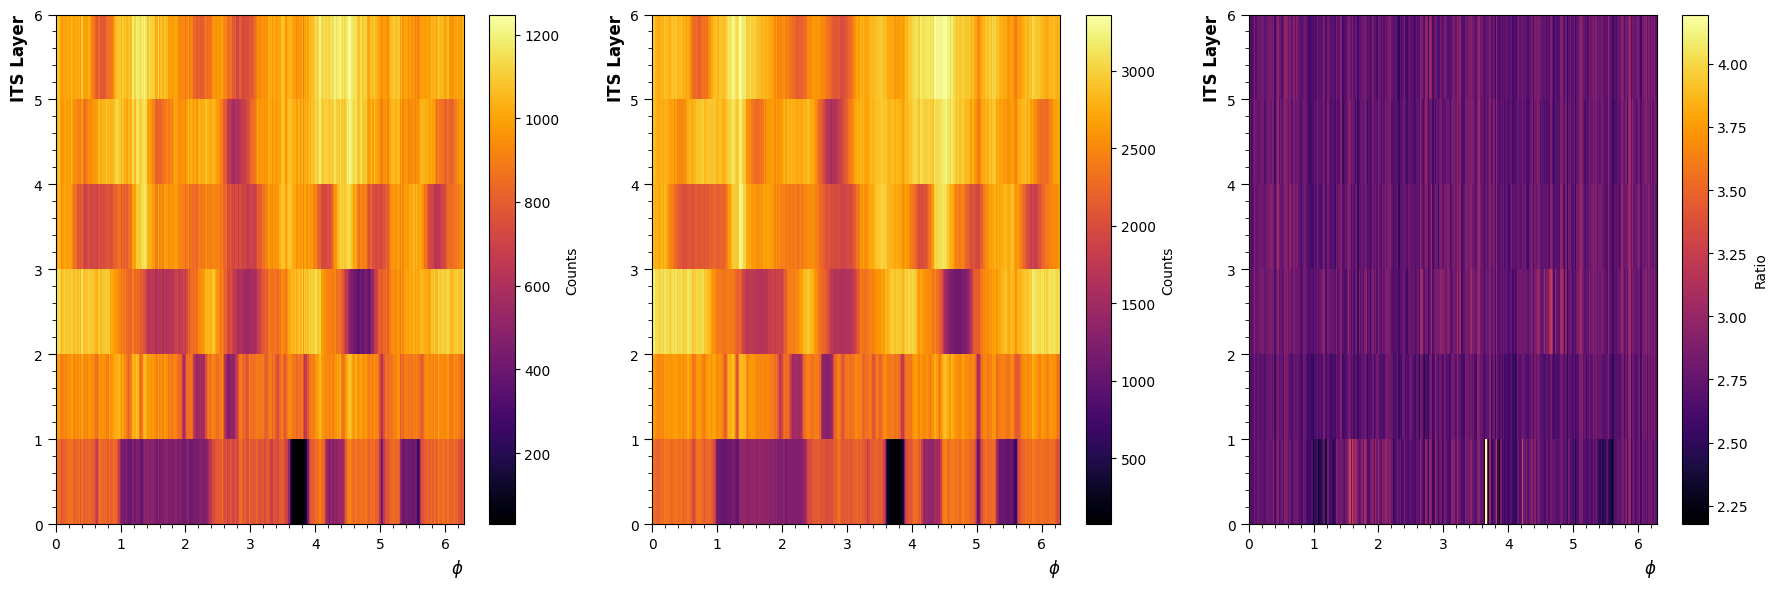

In [41]:
# plot ITS Layer vs Phi
hist_name = "hITSLayerVsPhi"

hist_dicts = [hist_dict_sig, hist_dict_bkg]

plt.figure(figsize=((len(hist_dicts) + 1) * 6, 6))

for i in range(len(hist_dicts)):

    plt.subplot(1, len(hist_dicts) + 1, i + 1)

    hist_dict = hist_dicts[i]

    values, xedges, yedges = hist_dict[hist_name].to_numpy()
    xcenters = (xedges[:-1] + xedges[1:]) / 2
    ycenters = (yedges[:-1] + yedges[1:]) / 2
    plt.pcolormesh(xedges, yedges, values.T, cmap='inferno')

    plt.ylabel('ITS Layer', loc='top', fontsize=12, fontweight='bold')
    plt.xlabel(r'$\phi$', loc='right', fontsize=12, fontweight='bold')

    plt.minorticks_on()
    plt.tick_params(direction='out', axis='both', which='both')
    plt.tick_params(which='minor', length=3)
    plt.tick_params(which='major', length=6)

    plt.colorbar(label='Counts')

# make a third plot, but of the ratio of both prev. plots
plt.subplot(1, len(hist_dicts) + 1, len(hist_dicts) + 1)

values_sig, xedges, yedges = hist_dict_sig[hist_name].to_numpy()
values_bkg, _, _ = hist_dict_bkg[hist_name].to_numpy()
values = values_bkg/ values_sig
plt.pcolormesh(xedges, yedges, values.T, cmap='inferno')

plt.ylabel('ITS Layer', loc='top', fontsize=12, fontweight='bold')
plt.xlabel(r'$\phi$', loc='right', fontsize=12, fontweight='bold')

plt.minorticks_on()
plt.tick_params(direction='out', axis='both', which='both')
plt.tick_params(which='minor', length=3)
plt.tick_params(which='major', length=6)

plt.colorbar(label='Ratio', pad=0.)

# the end
plt.tight_layout()
# plt.savefig("QA_SignalInteraction_Radius.svg")
plt.show()

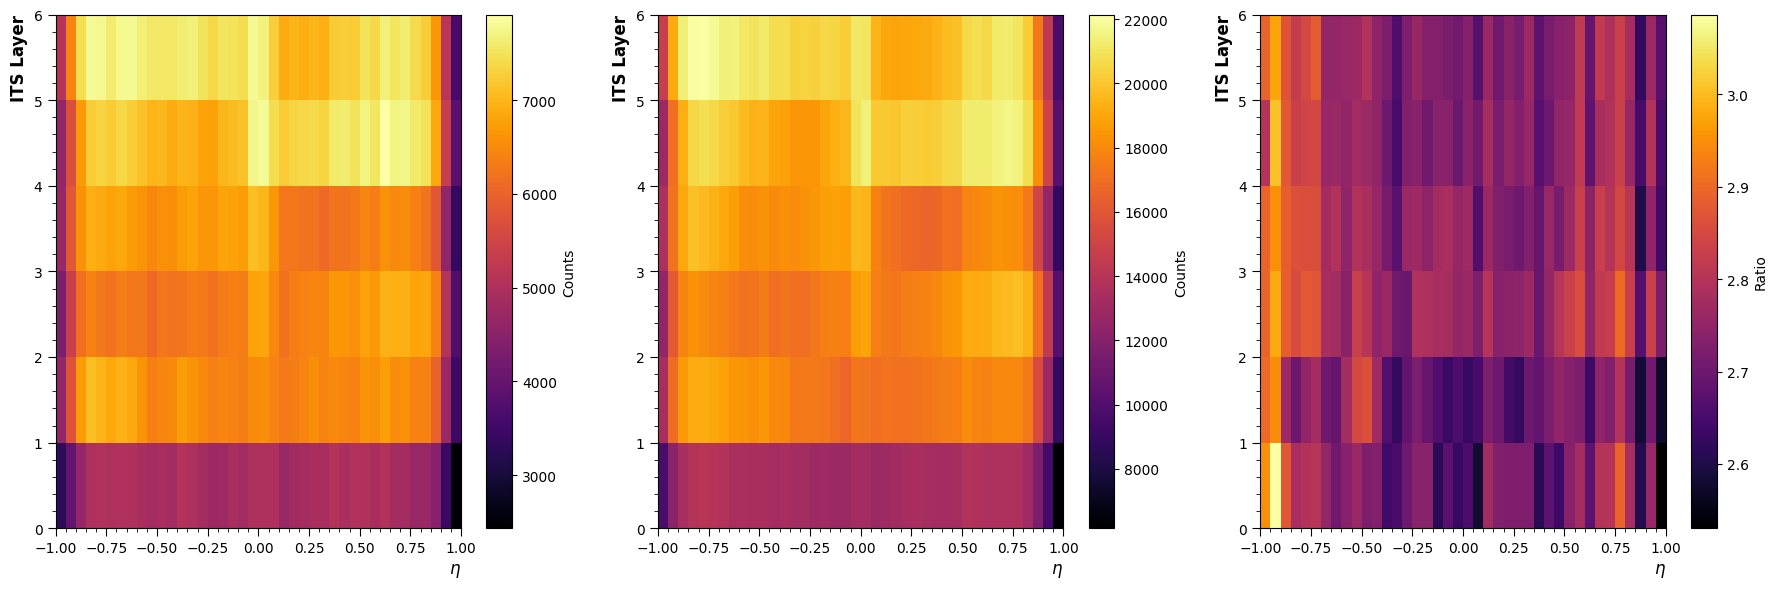

In [42]:
# plot ITS layer vs Eta
hist_name = "hITSLayerVsEta"

hist_dicts = [hist_dict_sig, hist_dict_bkg]

plt.figure(figsize=((len(hist_dicts) + 1) * 6, 6))

for i in range(len(hist_dicts)):

    plt.subplot(1, len(hist_dicts) + 1, i + 1)

    hist_dict = hist_dicts[i]

    values, xedges, yedges = hist_dict[hist_name].to_numpy()
    xcenters = (xedges[:-1] + xedges[1:]) / 2
    ycenters = (yedges[:-1] + yedges[1:]) / 2
    plt.pcolormesh(xedges, yedges, values.T, cmap='inferno')

    plt.ylabel('ITS Layer', loc='top', fontsize=12, fontweight='bold')
    plt.xlabel(r'$\eta$', loc='right', fontsize=12, fontweight='bold')

    plt.minorticks_on()
    plt.tick_params(direction='out', axis='both', which='both')
    plt.tick_params(which='minor', length=3)
    plt.tick_params(which='major', length=6)

    plt.colorbar(label='Counts')

# make a third plot, but of the ratio of both prev. plots
plt.subplot(1, len(hist_dicts) + 1, len(hist_dicts) + 1)

values_sig, xedges, yedges = hist_dict_sig[hist_name].to_numpy()
values_bkg, _, _ = hist_dict_bkg[hist_name].to_numpy()
values = values_bkg / values_sig
plt.pcolormesh(xedges, yedges, values.T, cmap='inferno')

plt.ylabel('ITS Layer', loc='top', fontsize=12, fontweight='bold')
plt.xlabel(r'$\eta$', loc='right', fontsize=12, fontweight='bold')

plt.minorticks_on()
plt.tick_params(direction='out', axis='both', which='both')
plt.tick_params(which='minor', length=3)
plt.tick_params(which='major', length=6)

plt.colorbar(label='Ratio')

# the end
plt.tight_layout()
# plt.savefig("QA_SignalInteraction_Radius.svg")
plt.show()

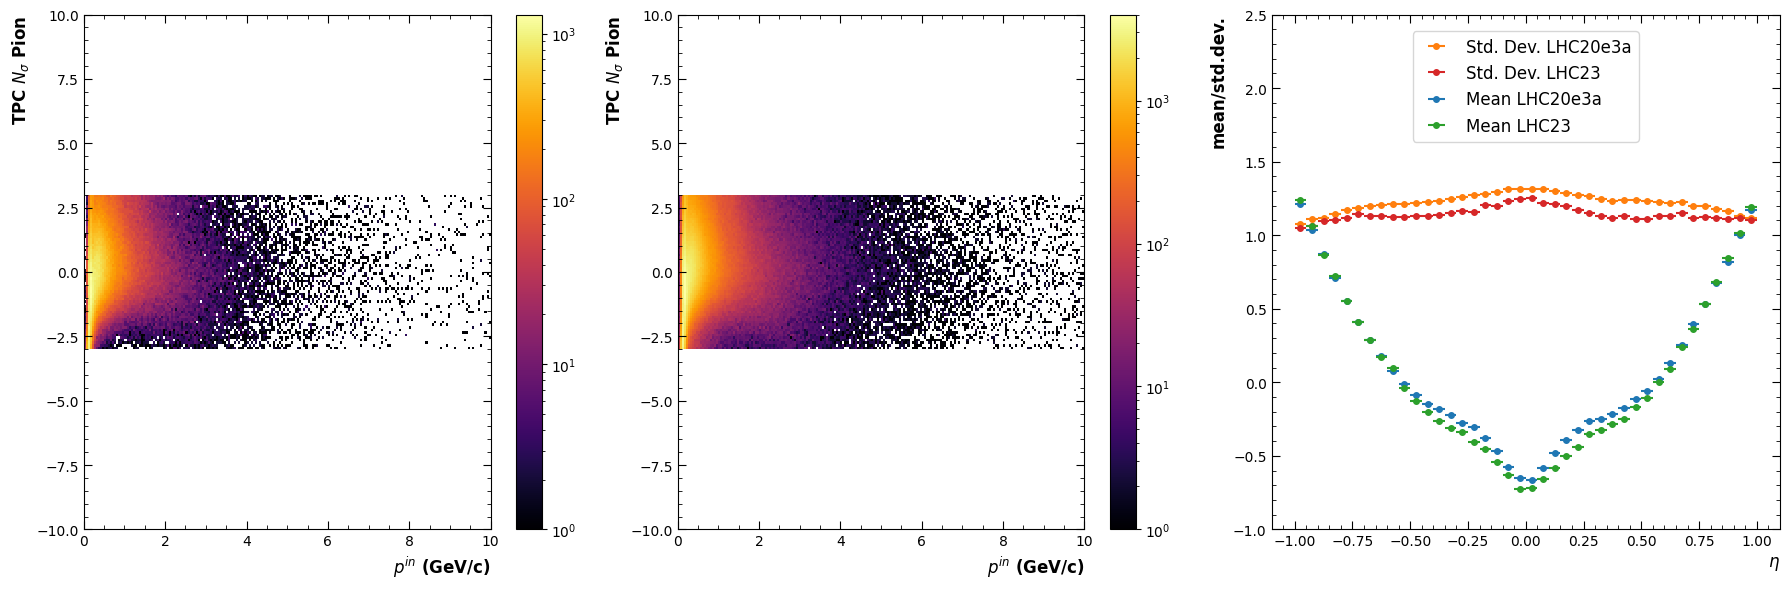

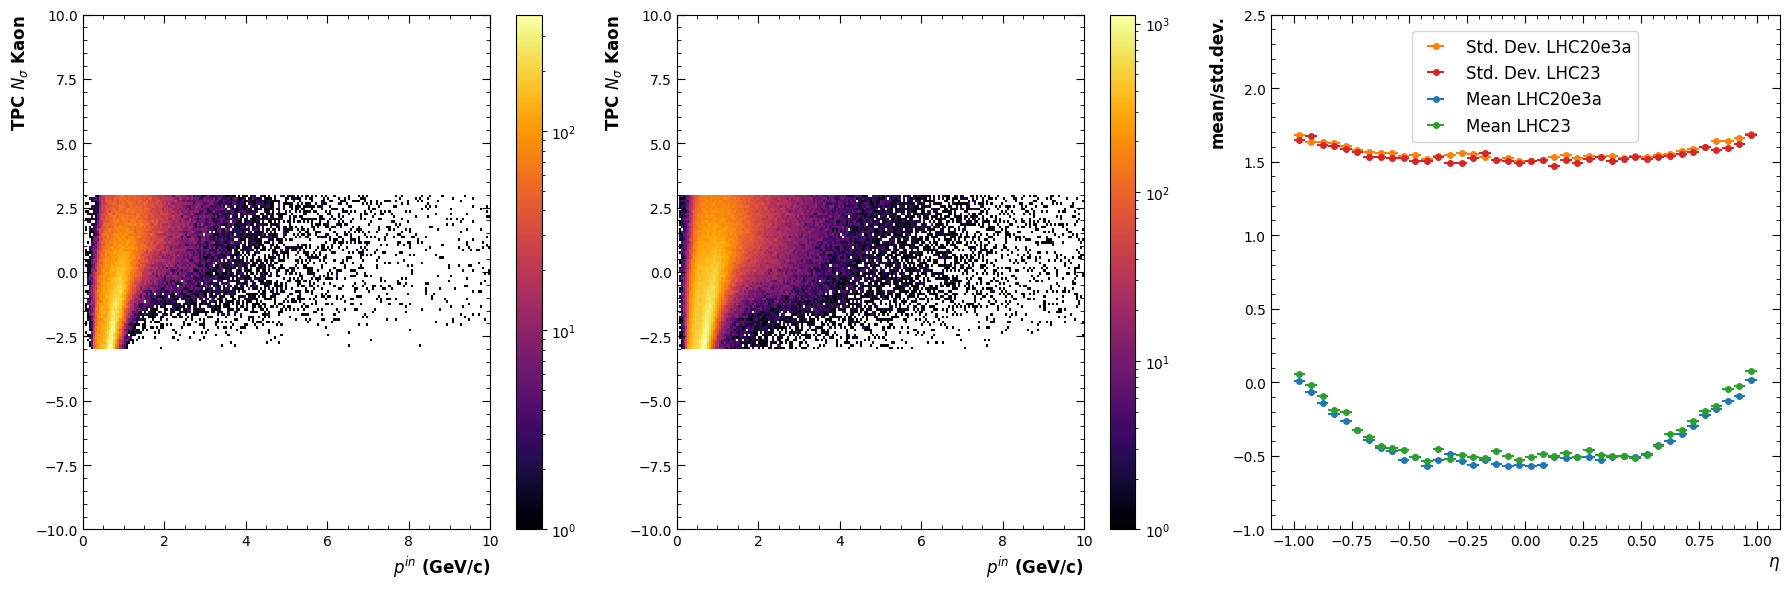

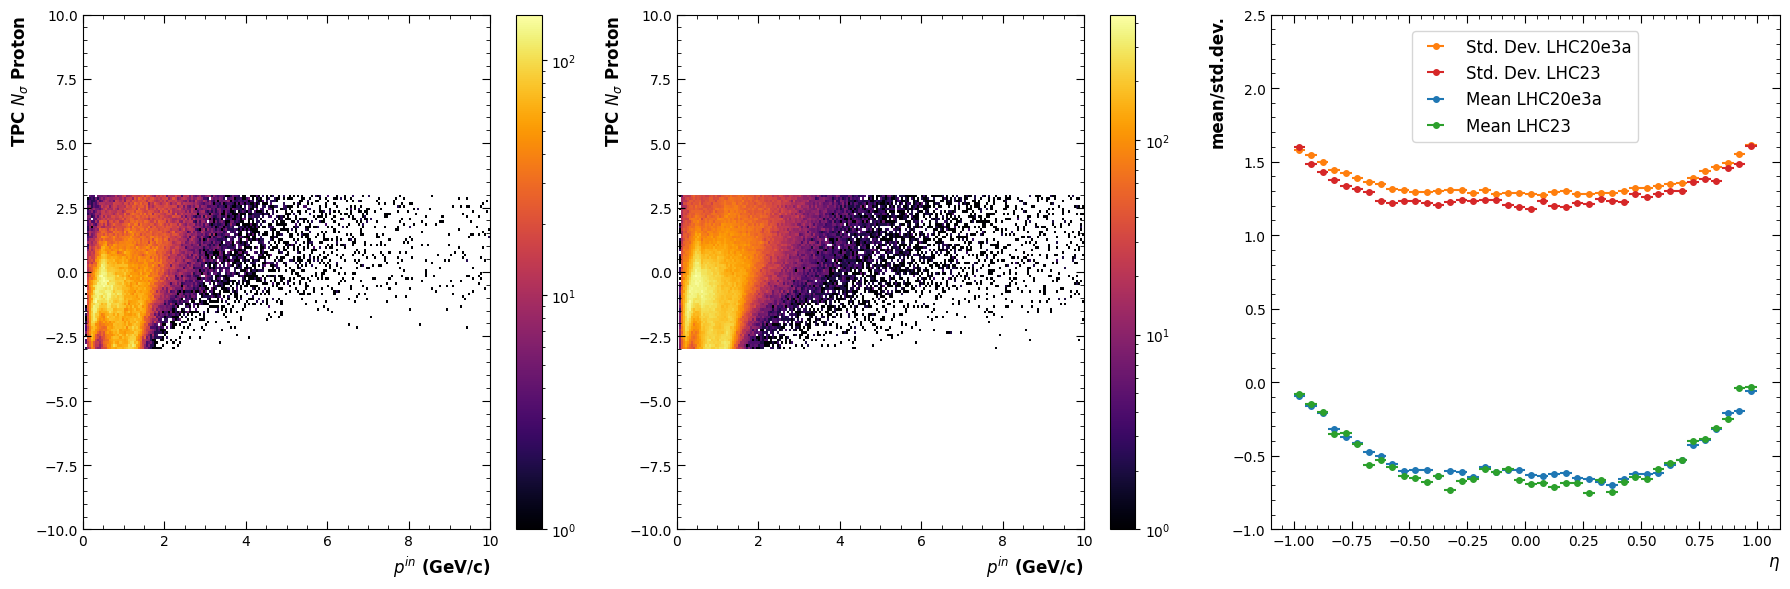

In [131]:
# plot TPC N Sigma [pi,kaon, proton] vs inner param. momentum
for part_name in ["Pion", "Kaon", "Proton"]:

    hist_name = "hTPCNSigma" + part_name + "VsInnerParamP"
    hist_dicts = [hist_dict_sig, hist_dict_bkg]

    plt.figure(figsize=((len(hist_dicts) + 1) * 6, 6))

    cmap = plt.cm.inferno
    cmap.set_under(color='white')

    for i in range(len(hist_dicts)):

        plt.subplot(1, len(hist_dicts) + 1, i + 1)

        hist_dict = hist_dicts[i]

        values, xedges, yedges = hist_dict[hist_name].to_numpy()
        xcenters = (xedges[:-1] + xedges[1:]) / 2
        ycenters = (yedges[:-1] + yedges[1:]) / 2

        # plt.pcolormesh(xedges, yedges, values.T, cmap=cmap, vmin=1, norm=matplotlib.colors.LogNorm())
        plt.pcolormesh(xedges, yedges, values.T, cmap=cmap, norm="log")

        plt.ylabel(r'TPC $N_{\sigma}$ ' + part_name, loc='top', fontsize=12, fontweight='bold')
        plt.xlabel(r'$p^{in}$ (GeV/c)', loc='right', fontsize=12, fontweight='bold')

        plt.minorticks_on()
        plt.tick_params(direction='in', axis='both', which='both', top=True, right=True)
        plt.tick_params(which='minor', length=3)
        plt.tick_params(which='major', length=6)

        plt.colorbar()

    # make a third plot, but of the ratio of both prev. plots
    plt.subplot(1, len(hist_dicts) + 1, 3)

    values_bkg, xedges, yedges = hist_dict_bkg["hTPCNSigma" + part_name + "VsEta"].to_numpy()
    values_sig, __, __ = hist_dict_sig["hTPCNSigma" + part_name + "VsEta"].to_numpy()

    mean_bkg = []
    std_dev_bkg = []
    for i in range(len(values_bkg)):
        weights = values_bkg[i]
        mean_value = np.sum(weights * yedges[:-1]) / np.sum(weights)
        std_dev_value = np.sqrt(np.sum(weights * (yedges[:-1] - mean_value)**2) / np.sum(weights))
        mean_bkg.append(mean_value)
        std_dev_bkg.append(std_dev_value)

    mean_sig = []
    std_dev_sig = []
    for i in range(len(values_sig)):
        weights = values_sig[i]
        mean_value = np.sum(weights * yedges[:-1]) / np.sum(weights)
        std_dev_value = np.sqrt(np.sum(weights * (yedges[:-1] - mean_value)**2) / np.sum(weights))
        mean_sig.append(mean_value)
        std_dev_sig.append(std_dev_value)

    bin_width_sig = xedges[1] - xedges[0]
    plt.errorbar( (xedges[:-1] + xedges[1:]) / 2, std_dev_bkg, xerr=bin_width_sig/2, fmt='o', label="Std. Dev. LHC20e3a", color=colors[1], markersize=4)
    plt.errorbar( (xedges[:-1] + xedges[1:]) / 2, std_dev_sig, xerr=bin_width_sig/2, fmt='o', label="Std. Dev. LHC23", color=colors[3], markersize=4)
    plt.errorbar( (xedges[:-1] + xedges[1:]) / 2, mean_bkg, xerr=bin_width_sig/2, fmt='o', label="Mean LHC20e3a", color=colors[0], markersize=4)
    plt.errorbar( (xedges[:-1] + xedges[1:]) / 2, mean_sig, xerr=bin_width_sig/2, fmt='o', label="Mean LHC23", color=colors[2], markersize=4)

    plt.legend(loc="upper center", fontsize=12, borderaxespad=1.)

    plt.ylabel('mean/std.dev.', loc='top', fontsize=12, fontweight='bold')
    plt.xlabel(r'$\eta$', loc='right', fontsize=12, fontweight='bold')

    plt.ylim(top=2.5, bottom=-1)

    plt.minorticks_on()
    plt.tick_params(direction='in', axis='both', which='both', top=True, right=True)
    plt.tick_params(which='minor', length=3)
    plt.tick_params(which='major', length=6)

    # the end
    plt.tight_layout()
    # plt.savefig("QA_SignalInteraction_Radius.svg")
    plt.show()


/tmp/ipykernel_85607/1902960925.py:20: RuntimeWarning: divide by zero encountered in divide
  values = values_bkg / values_sig
/tmp/ipykernel_85607/1902960925.py:20: RuntimeWarning: invalid value encountered in divide
  values = values_bkg / values_sig


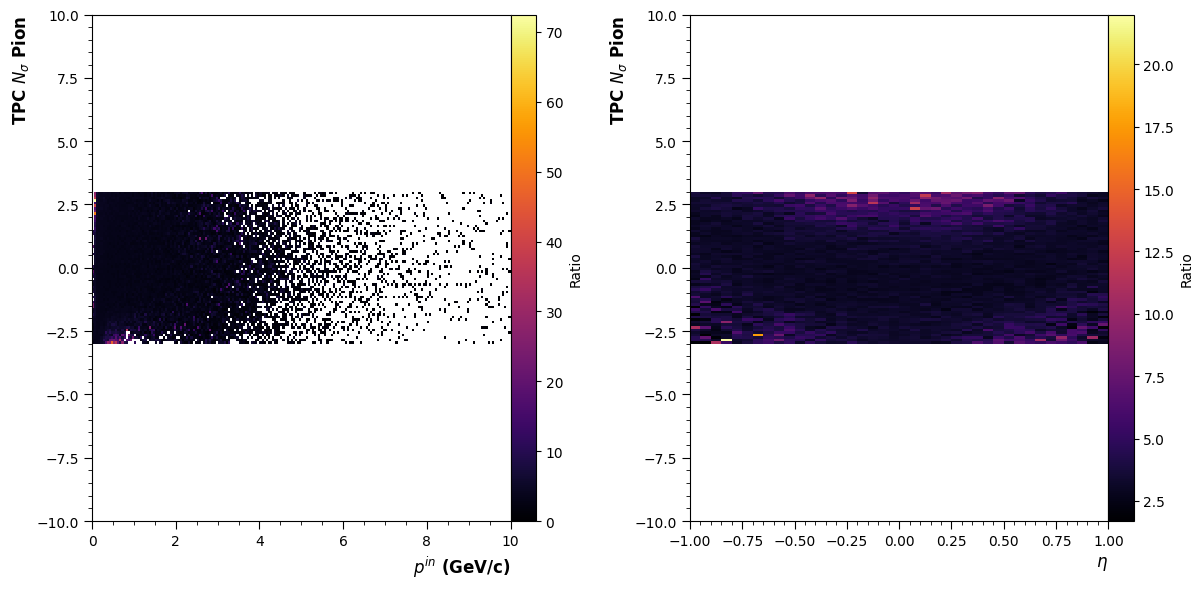

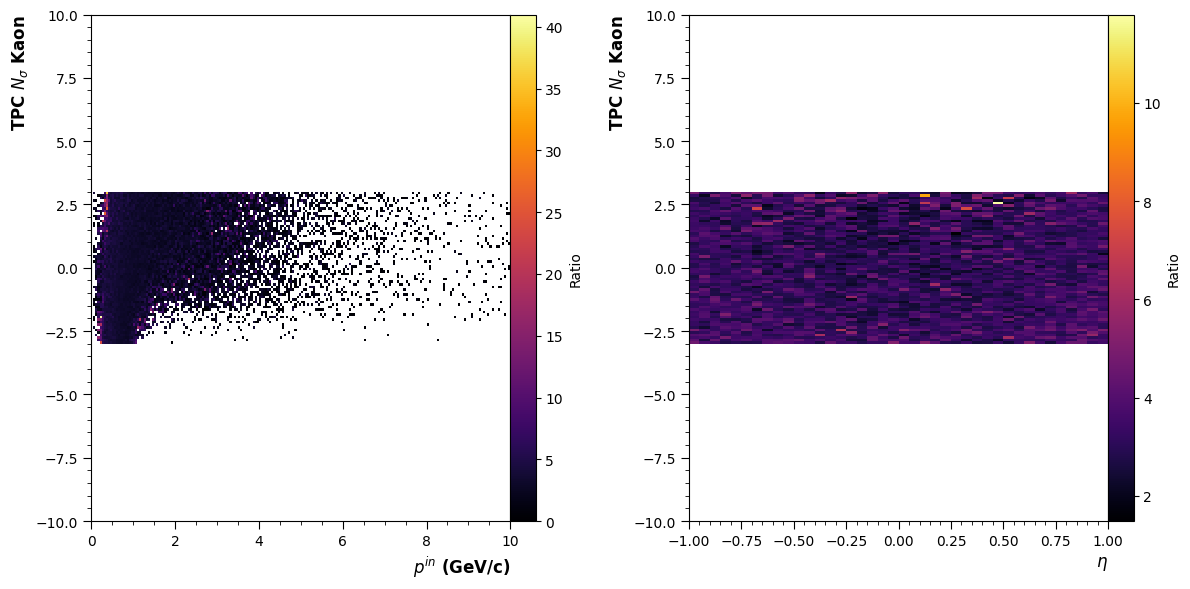

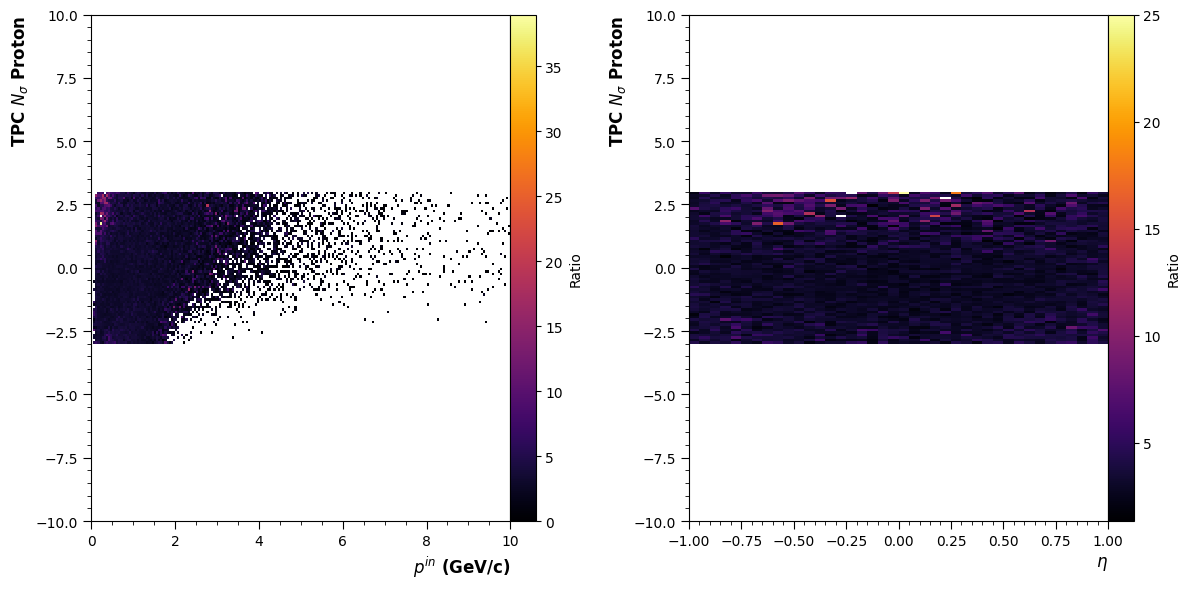

In [136]:
# plot ratio TPC N sigma [pion, kaon, proton] vs [inner param. momentum, eta]

part_names = ["Pion", "Kaon", "Proton"]

for part_name in part_names:

    hist_names = ["hTPCNSigma" + part_name + "VsInnerParamP", "hTPCNSigma" + part_name + "VsEta"]
    var_names = [r'$p^{in}$ (GeV/c)', r'$\eta$']

    plt.figure(figsize=((len(hist_names) + 1) * 6, 6))

    for i in range(len(hist_names)):

        plt.subplot(1, len(hist_names) + 1, i + 1)

        hist_name = hist_names[i]

        values_sig, xedges, yedges = hist_dict_sig[hist_name].to_numpy()
        values_bkg, __, __ = hist_dict_bkg[hist_name].to_numpy()
        values = values_bkg / values_sig
        xcenters = (xedges[:-1] + xedges[1:]) / 2
        ycenters = (yedges[:-1] + yedges[1:]) / 2
        plt.pcolormesh(xedges, yedges, values.T, cmap='inferno')

        plt.ylabel(r'TPC $N_{\sigma}$ ' + part_name, loc='top', fontsize=12, fontweight='bold')
        plt.xlabel(var_names[i], loc='right', fontsize=12, fontweight='bold')

        plt.minorticks_on()
        plt.tick_params(direction='out', axis='both', which='both')
        plt.tick_params(which='minor', length=3)
        plt.tick_params(which='major', length=6)

        plt.colorbar(label='Ratio', pad=0.)

    # the end
    plt.tight_layout()
    # plt.savefig("QA_SignalInteraction_Radius.svg")
    plt.show()